# Lockman SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
255270d (Fri Nov 24 10:35:51 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_lockman-swire_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_lockman-swire_20171128.fits


## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

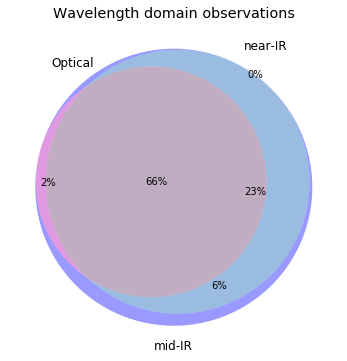

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

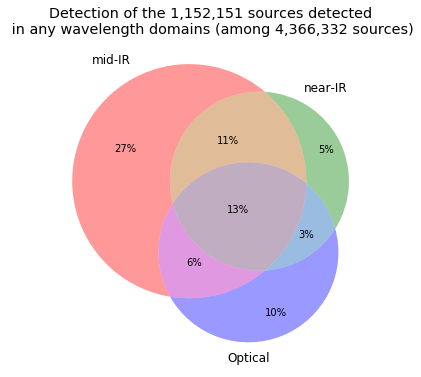

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u",          "CFHT Megacam u"]
g_bands = ["WFC g", "RCS g", "CFHT Megacam g",  "GPC1 g"]
r_bands = ["WFC r", "RCS r", "CFHT Megacam r",  "GPC1 r"]
i_bands = ["WFC i", "RCS i",                    "GPC1 i"]
z_bands = ["WFC z", "RCS z", "CFHT Megacam z",  "GPC1 z"]
y_bands = [         "RCS y",                    "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

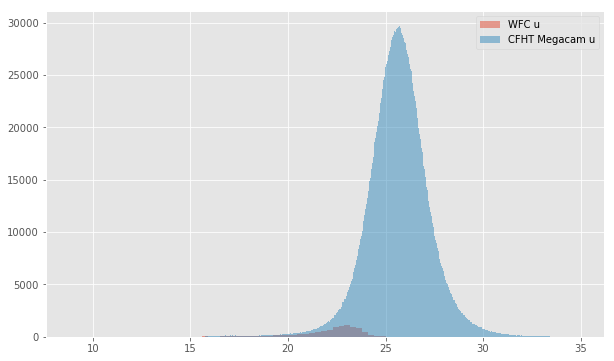

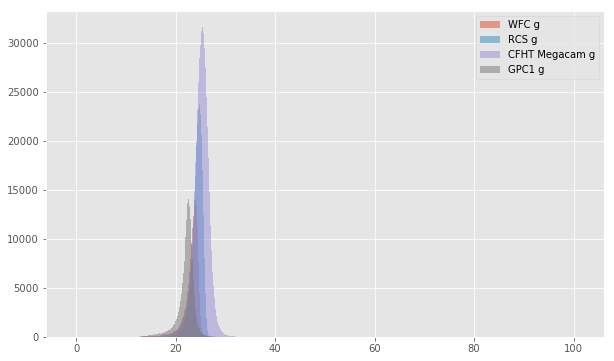

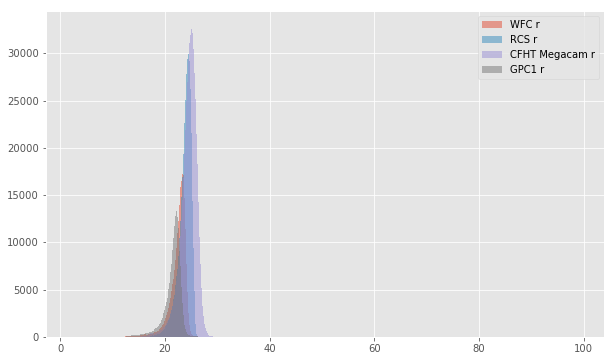

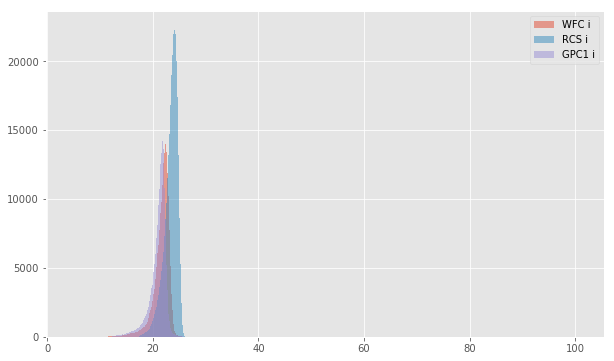

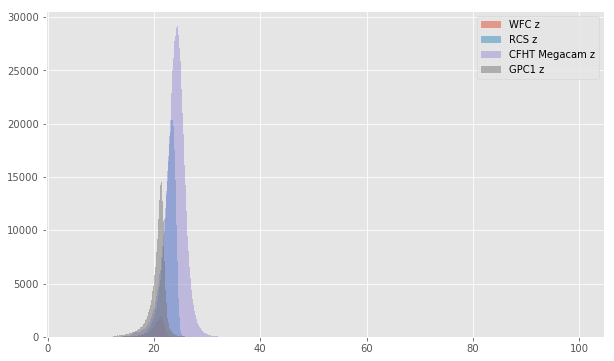

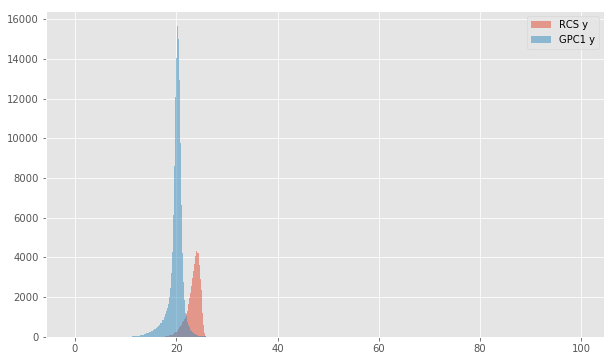

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

CFHT Megacam u (aperture) - WFC u (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.25
- 1% percentile: -0.9491949844360351
- 99% percentile: 3.2663552665710673


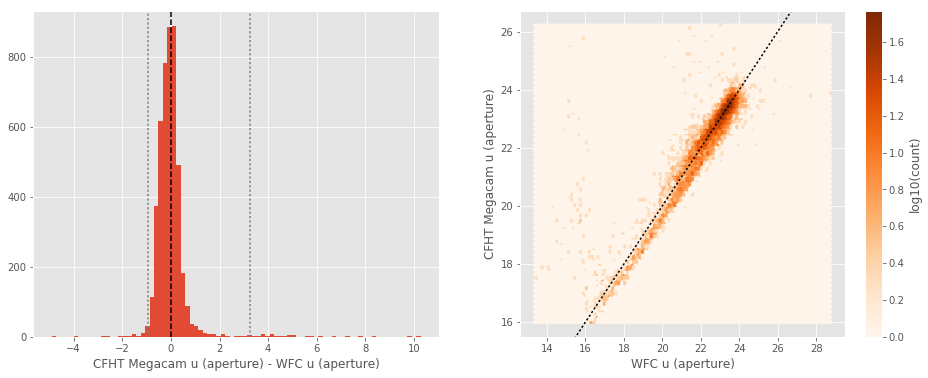

CFHT Megacam u (total) - WFC u (total):
- Median: -0.27
- Median Absolute Deviation: 0.21
- 1% percentile: -1.6218692207336425
- 99% percentile: 2.0539311504363935


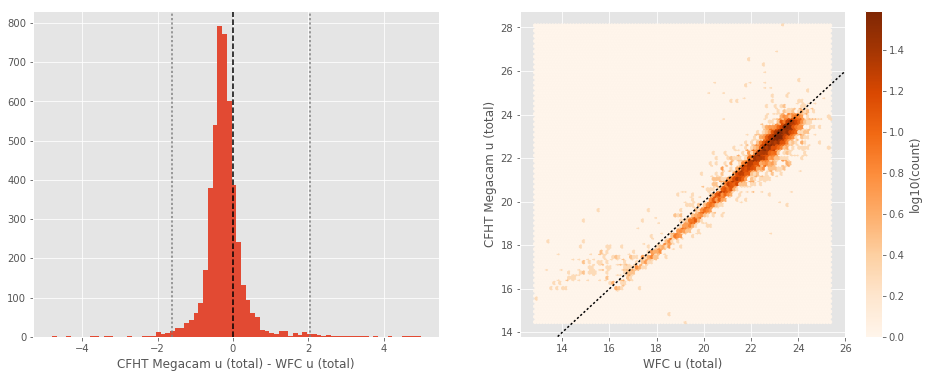

No sources have both WFC g (aperture) and RCS g (aperture) values.
RCS g (total) - WFC g (total):
- Median: -0.08
- Median Absolute Deviation: 0.18
- 1% percentile: -0.9441648864746093
- 99% percentile: 1.156666412353516


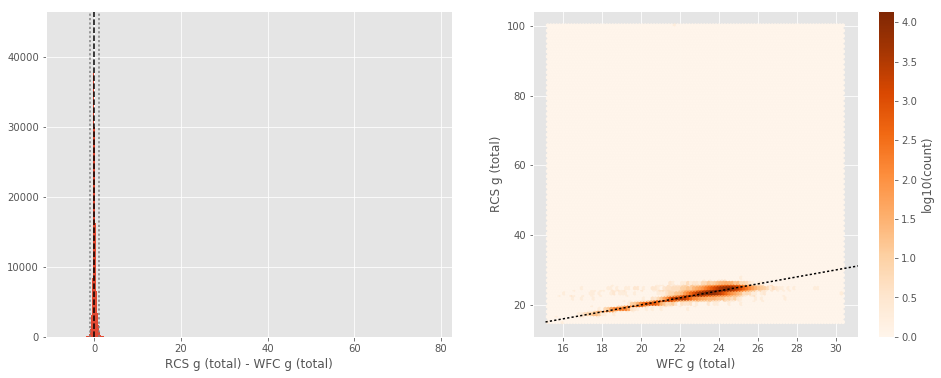

CFHT Megacam g (aperture) - WFC g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.14
- 1% percentile: -0.5078629302978516
- 99% percentile: 0.8724484062194824


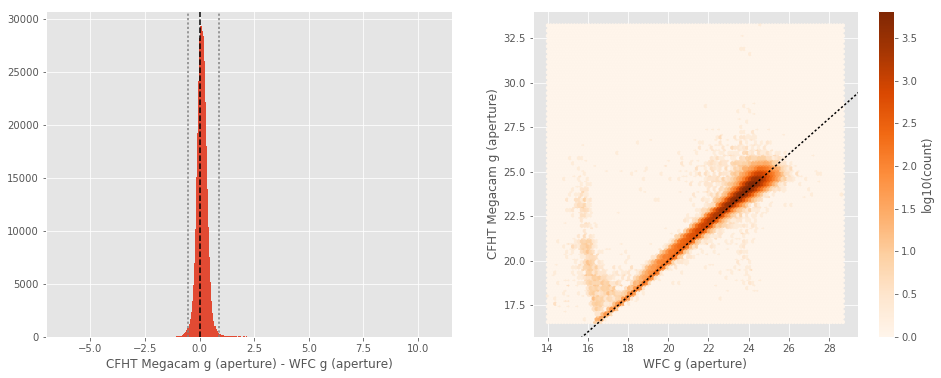

CFHT Megacam g (total) - WFC g (total):
- Median: -0.04
- Median Absolute Deviation: 0.15
- 1% percentile: -0.8757493972778321
- 99% percentile: 1.4329431533813466


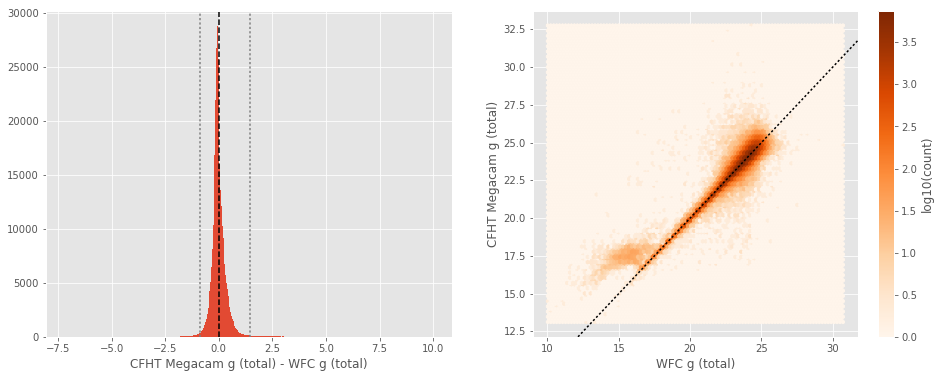

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.14
- Median Absolute Deviation: 0.27
- 1% percentile: -2.033579864501953
- 99% percentile: 2.2427005767822266


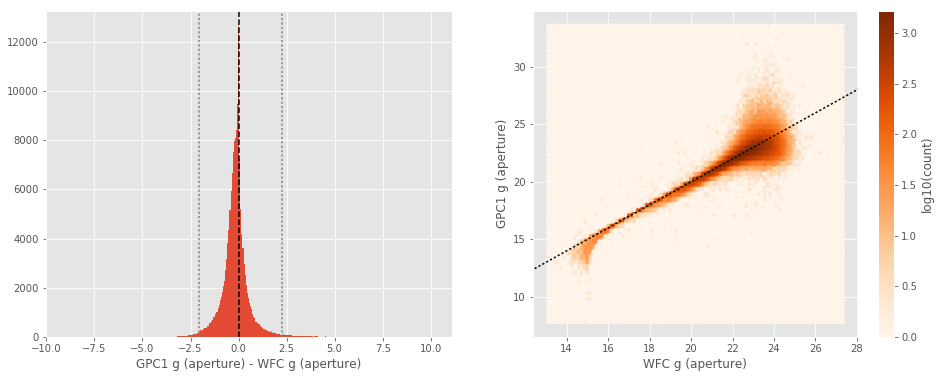

GPC1 g (total) - WFC g (total):
- Median: -0.03
- Median Absolute Deviation: 0.24
- 1% percentile: -2.5378850173950194
- 99% percentile: 1.7712992477417002


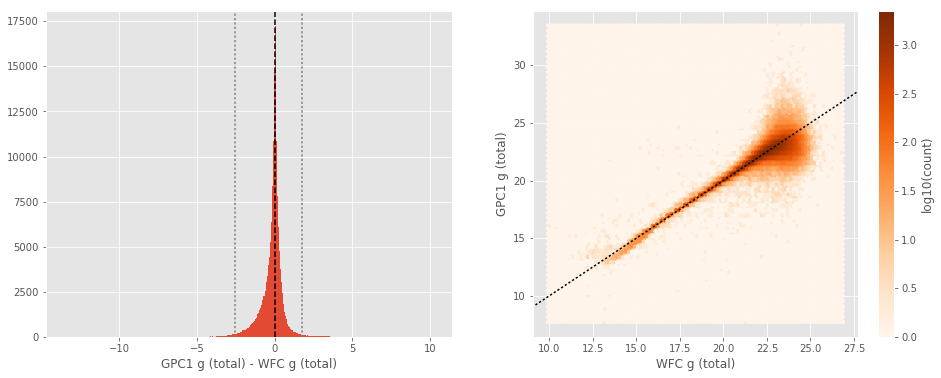

No sources have both RCS g (aperture) and CFHT Megacam g (aperture) values.
CFHT Megacam g (total) - RCS g (total):
- Median: 0.05
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0496853256225587
- 99% percentile: 1.2588200759887684


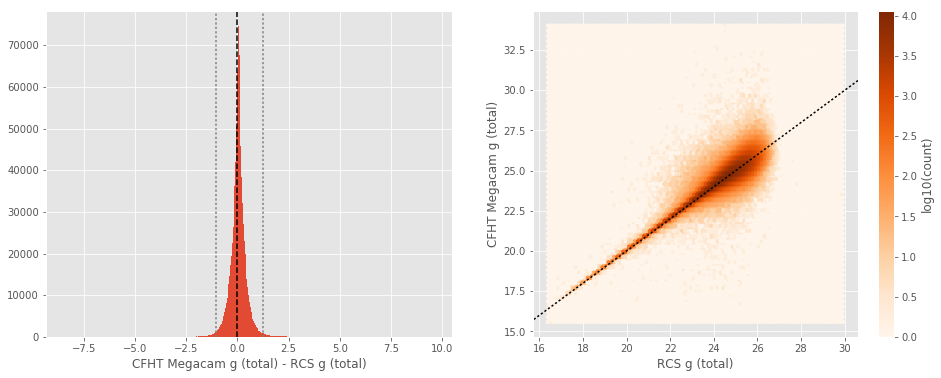

No sources have both RCS g (aperture) and GPC1 g (aperture) values.
GPC1 g (total) - RCS g (total):
- Median: 0.04
- Median Absolute Deviation: 0.31
- 1% percentile: -3.0529003143310547
- 99% percentile: 1.9456966972351046


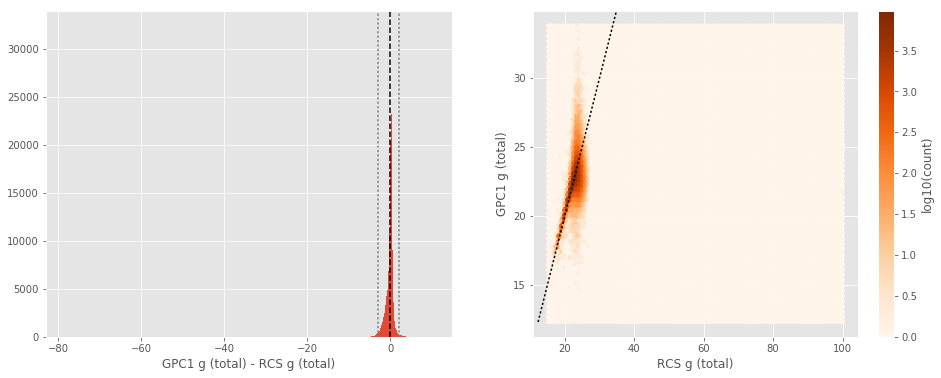

GPC1 g (aperture) - CFHT Megacam g (aperture):
- Median: -0.33
- Median Absolute Deviation: 0.38
- 1% percentile: -2.9429248237609866
- 99% percentile: 2.1852089309692397


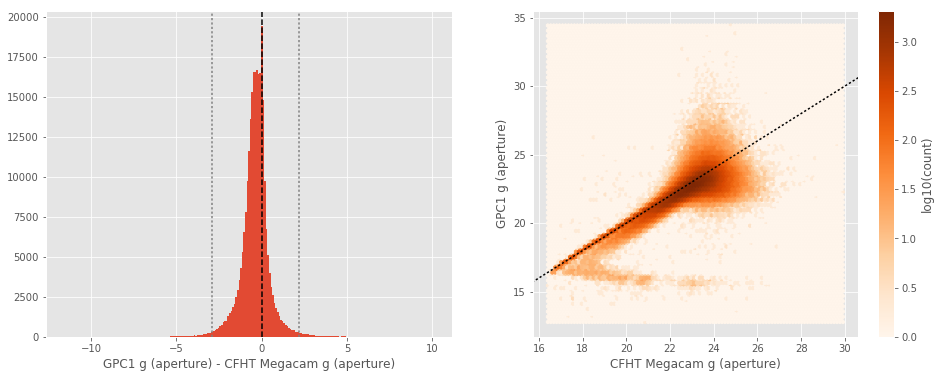

GPC1 g (total) - CFHT Megacam g (total):
- Median: 0.01
- Median Absolute Deviation: 0.27
- 1% percentile: -3.230147476196289
- 99% percentile: 1.8613366317748992


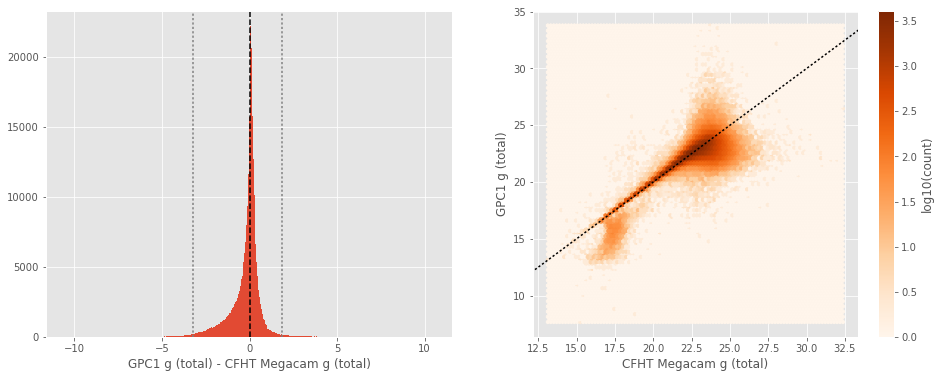

No sources have both WFC r (aperture) and RCS r (aperture) values.
RCS r (total) - WFC r (total):
- Median: -0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0184492111206054
- 99% percentile: 1.12237449645996


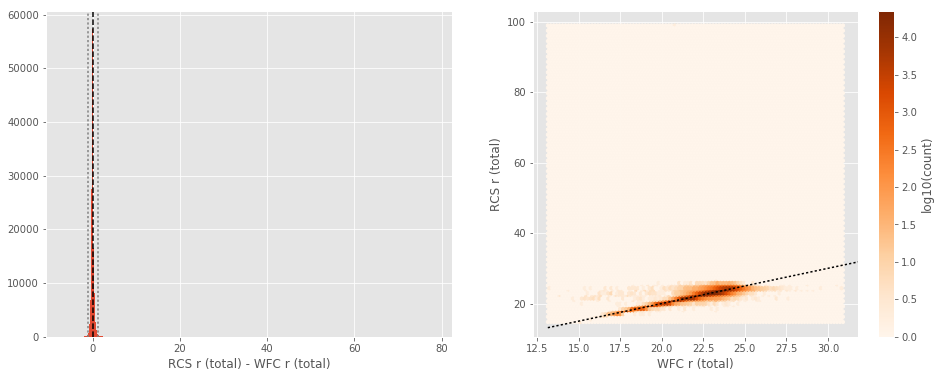

CFHT Megacam r (aperture) - WFC r (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -0.545387954711914
- 99% percentile: 1.148755531311045


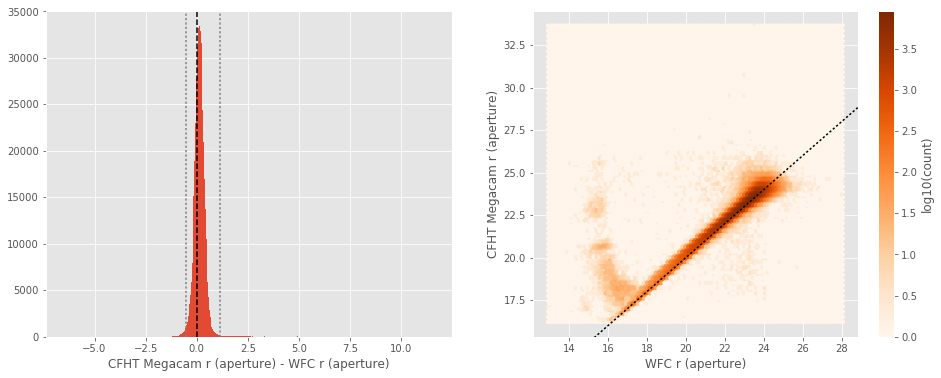

CFHT Megacam r (total) - WFC r (total):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9593395805358886
- 99% percentile: 1.6030628204345634


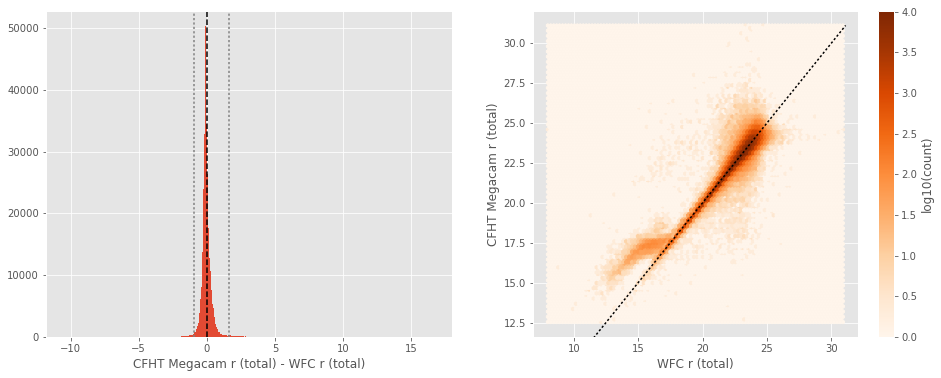

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2963315582275392
- 99% percentile: 1.1390761566162118


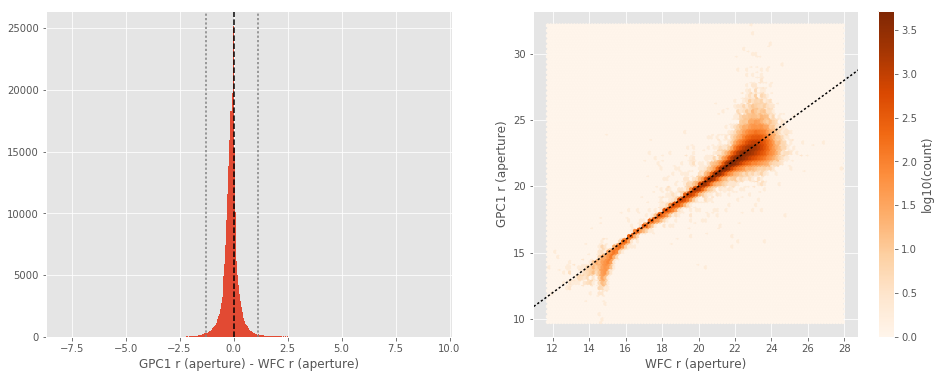

GPC1 r (total) - WFC r (total):
- Median: -0.01
- Median Absolute Deviation: 0.14
- 1% percentile: -1.7165836334228515
- 99% percentile: 0.9766998291015625


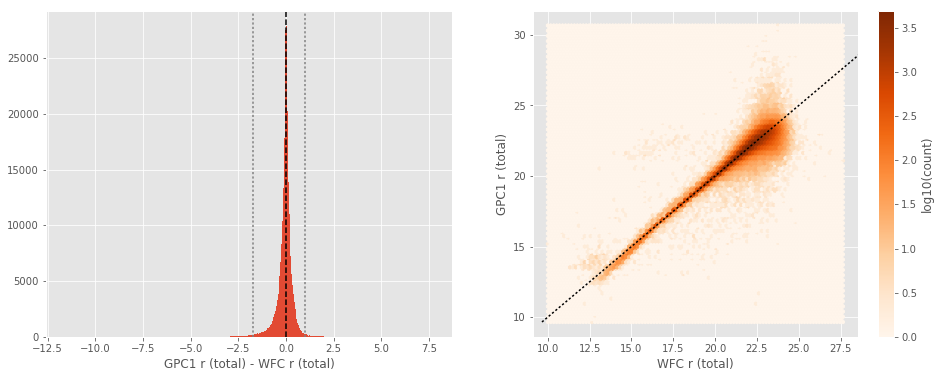

No sources have both RCS r (aperture) and CFHT Megacam r (aperture) values.
CFHT Megacam r (total) - RCS r (total):
- Median: 0.07
- Median Absolute Deviation: 0.17
- 1% percentile: -1.103610725402832
- 99% percentile: 1.3413280487060542


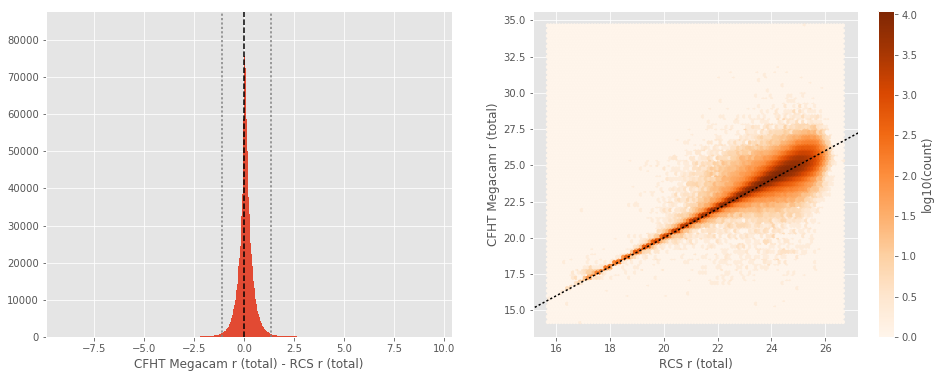

No sources have both RCS r (aperture) and GPC1 r (aperture) values.
GPC1 r (total) - RCS r (total):
- Median: 0.13
- Median Absolute Deviation: 0.14
- 1% percentile: -1.851234474182129
- 99% percentile: 1.0487995147705078


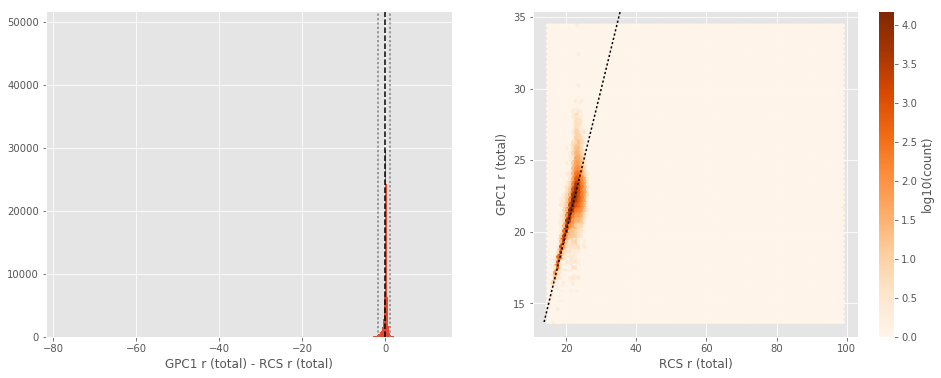

GPC1 r (aperture) - CFHT Megacam r (aperture):
- Median: -0.26
- Median Absolute Deviation: 0.25
- 1% percentile: -2.3193286895751952
- 99% percentile: 1.125625000000003


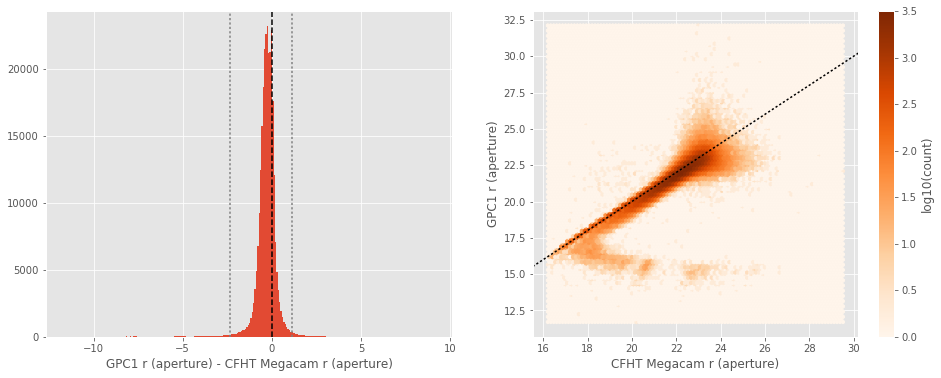

GPC1 r (total) - CFHT Megacam r (total):
- Median: 0.07
- Median Absolute Deviation: 0.14
- 1% percentile: -2.370811748504639
- 99% percentile: 1.0244120407104438


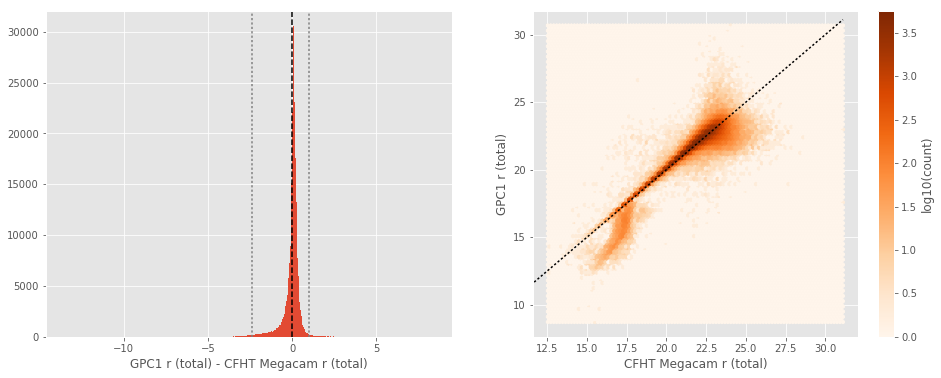

No sources have both WFC i (aperture) and RCS i (aperture) values.
RCS i (total) - WFC i (total):
- Median: -0.08
- Median Absolute Deviation: 0.20
- 1% percentile: -0.9779530334472656
- 99% percentile: 1.4092513275146472


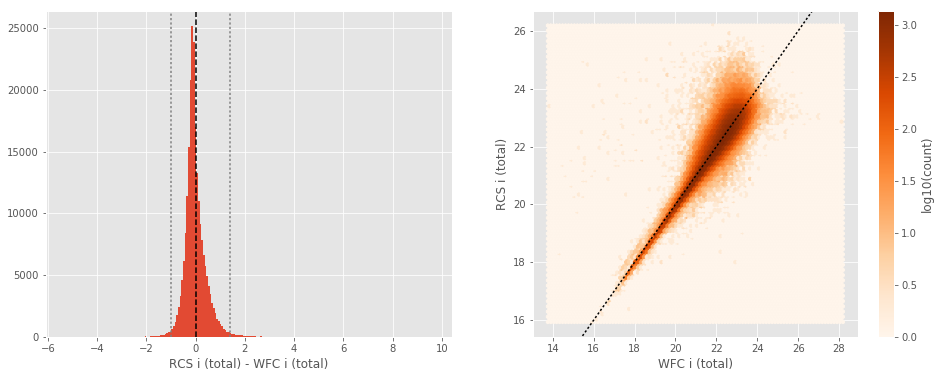

GPC1 i (aperture) - WFC i (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -1.025598430633545
- 99% percentile: 0.9575976371765118


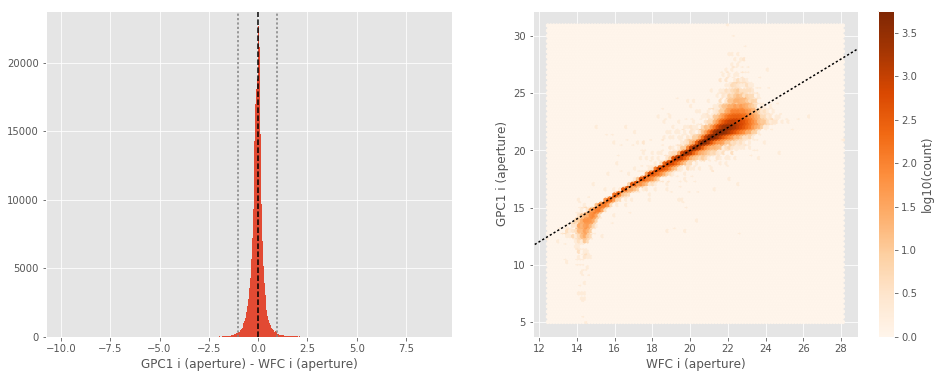

GPC1 i (total) - WFC i (total):
- Median: 0.06
- Median Absolute Deviation: 0.15
- 1% percentile: -1.102666082382202
- 99% percentile: 0.9996103668212877


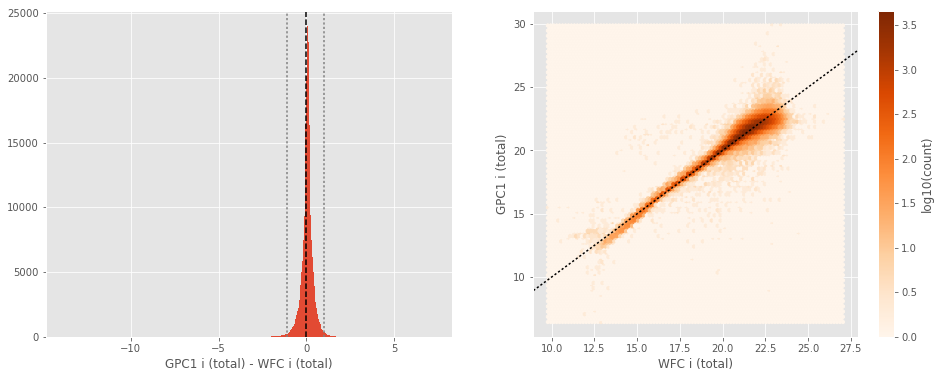

No sources have both RCS i (aperture) and GPC1 i (aperture) values.
GPC1 i (total) - RCS i (total):
- Median: 0.17
- Median Absolute Deviation: 0.12
- 1% percentile: -1.615425796508789
- 99% percentile: 0.8306423950195325


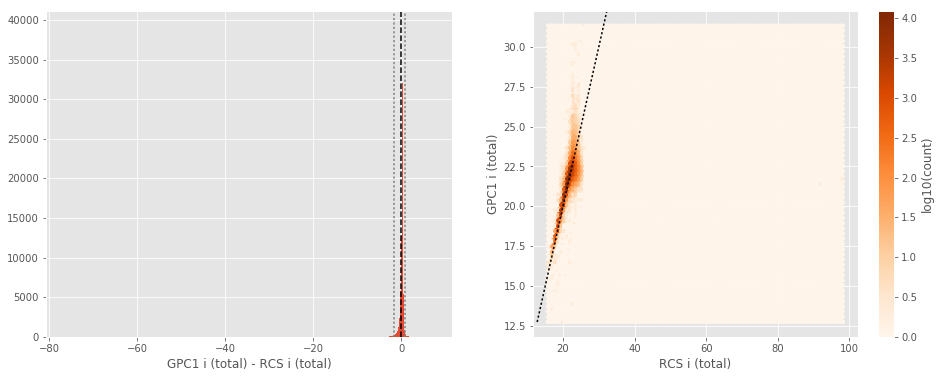

No sources have both WFC z (aperture) and RCS z (aperture) values.
RCS z (total) - WFC z (total):
- Median: -0.05
- Median Absolute Deviation: 0.24
- 1% percentile: -0.999578857421875
- 99% percentile: 1.782779693603516


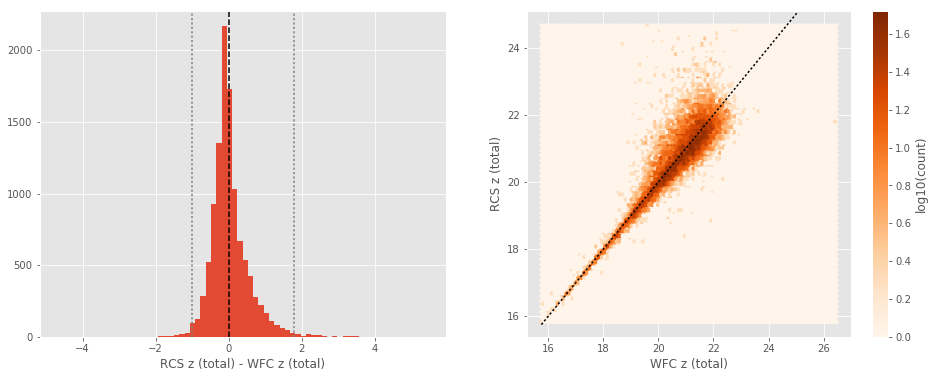

CFHT Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -0.6397380828857422
- 99% percentile: 3.043675384521484


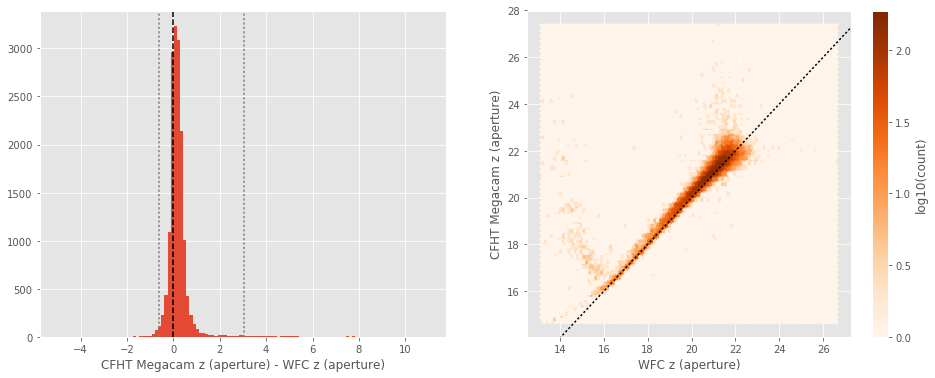

CFHT Megacam z (total) - WFC z (total):
- Median: -0.04
- Median Absolute Deviation: 0.22
- 1% percentile: -0.9713739395141602
- 99% percentile: 2.110036201477051


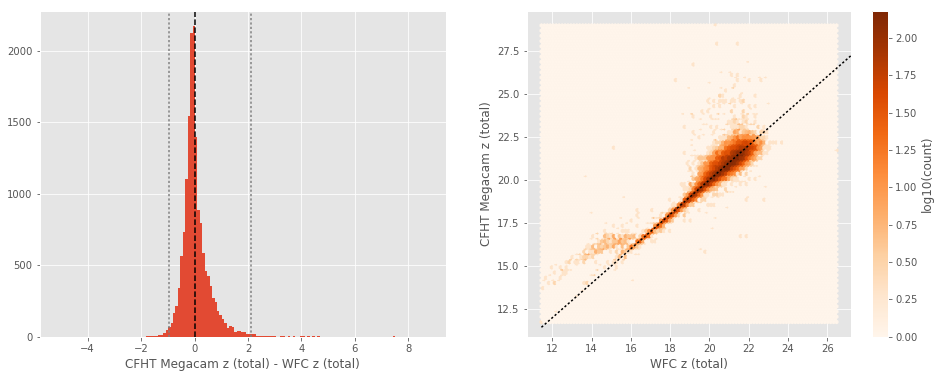

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.01
- Median Absolute Deviation: 0.15
- 1% percentile: -0.9230419921874999
- 99% percentile: 1.1071548843383785


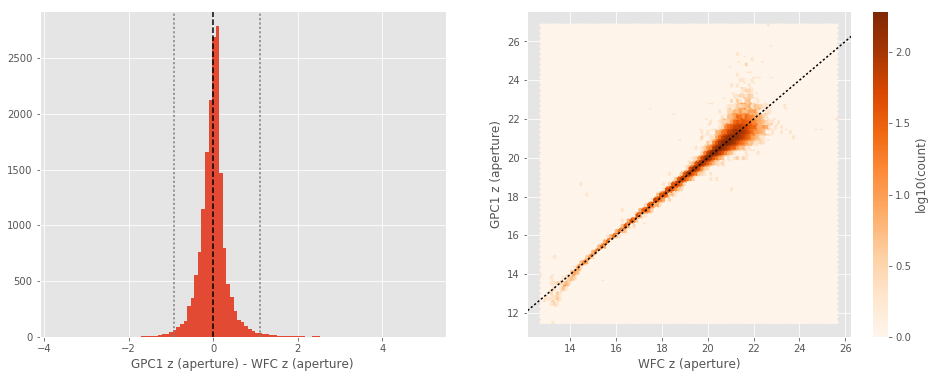

GPC1 z (total) - WFC z (total):
- Median: 0.09
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9829817771911621
- 99% percentile: 1.4533742713928244


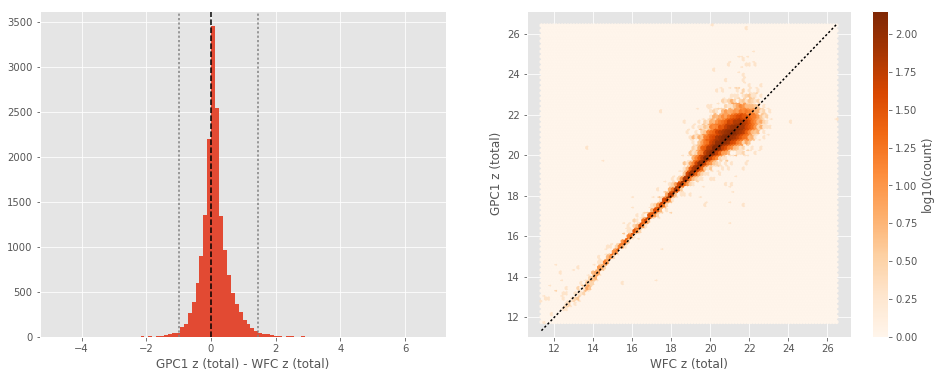

No sources have both RCS z (aperture) and CFHT Megacam z (aperture) values.
CFHT Megacam z (total) - RCS z (total):
- Median: 0.05
- Median Absolute Deviation: 0.24
- 1% percentile: -1.255912399291992
- 99% percentile: 2.259424972534189


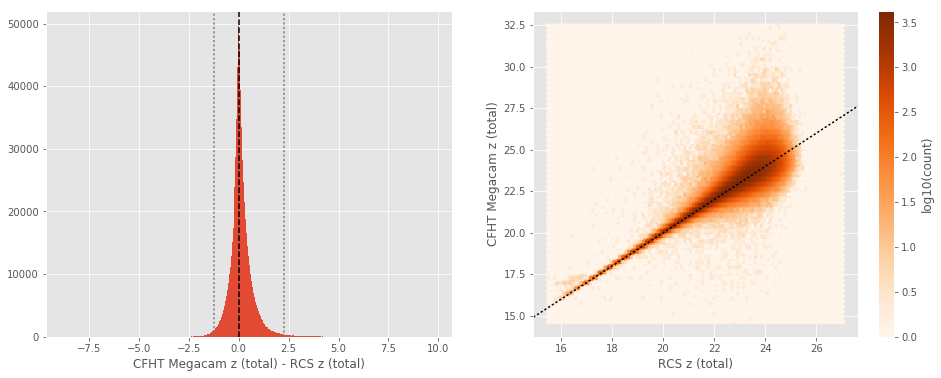

No sources have both RCS z (aperture) and GPC1 z (aperture) values.
GPC1 z (total) - RCS z (total):
- Median: 0.15
- Median Absolute Deviation: 0.18
- 1% percentile: -1.9935058212280274
- 99% percentile: 1.3433990478515625


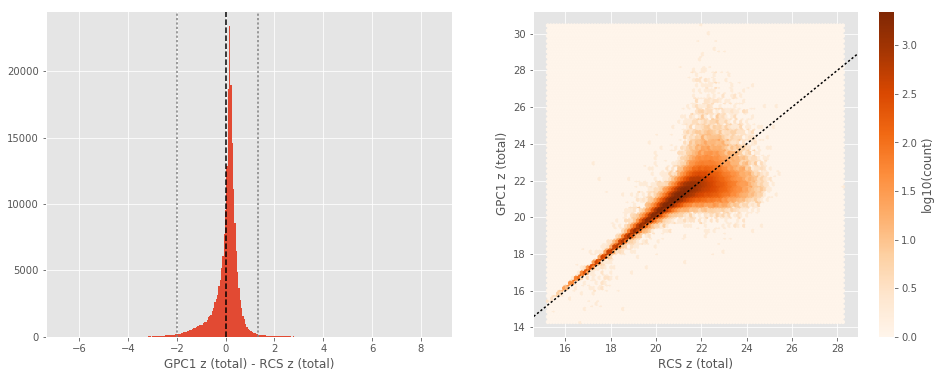

GPC1 z (aperture) - CFHT Megacam z (aperture):
- Median: -0.22
- Median Absolute Deviation: 0.26
- 1% percentile: -2.777841310501098
- 99% percentile: 1.4052535629272451


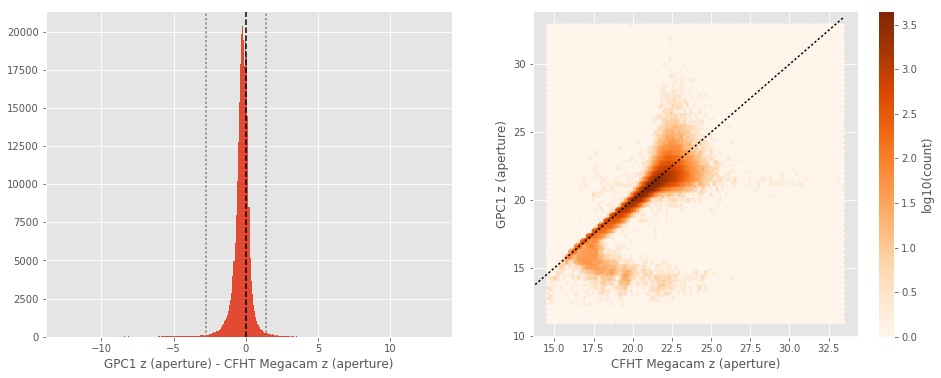

GPC1 z (total) - CFHT Megacam z (total):
- Median: 0.12
- Median Absolute Deviation: 0.18
- 1% percentile: -2.3167495727539062
- 99% percentile: 1.362018585205071


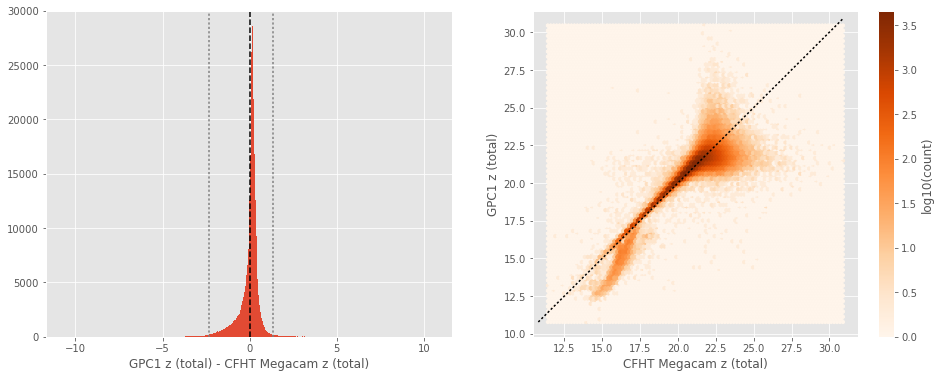

No sources have both RCS y (aperture) and GPC1 y (aperture) values.
GPC1 y (total) - RCS y (total):
- Median: -0.57
- Median Absolute Deviation: 0.41
- 1% percentile: -3.220444412231445
- 99% percentile: 1.1729692840576167


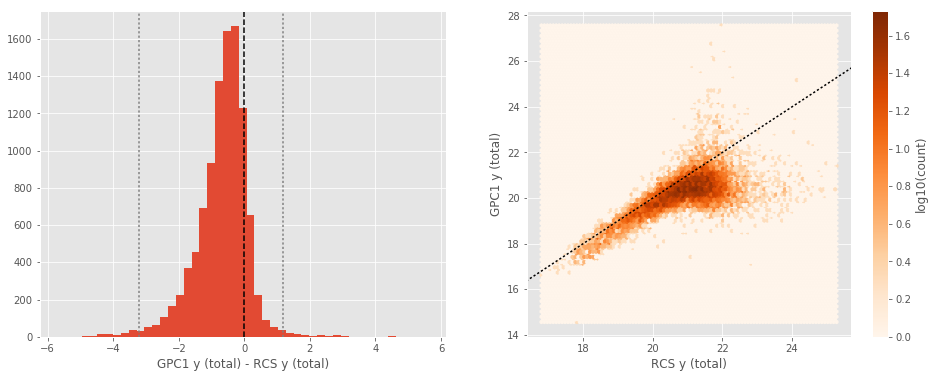

In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Lockman-SWIRE.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5710824012756348
- 99% percentile: 0.7945964813232422


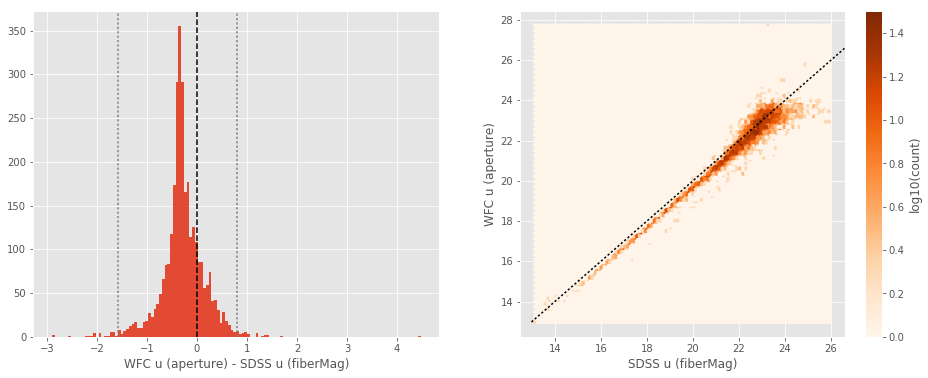

WFC u (total) - SDSS u (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5710824012756348
- 99% percentile: 0.7945964813232422


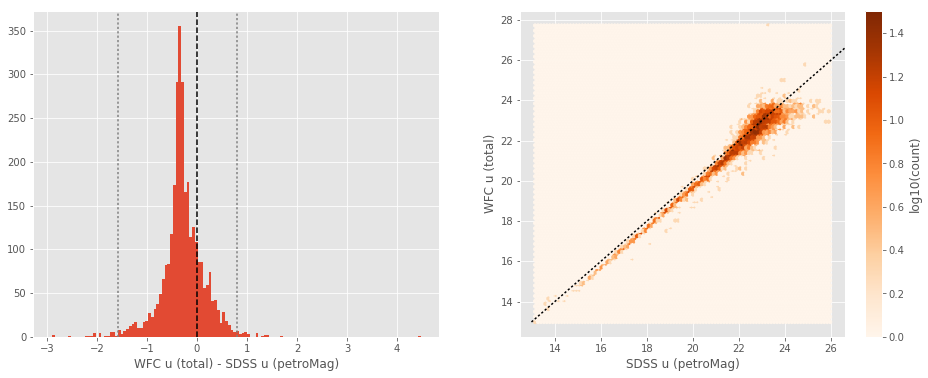

CFHT Megacam u (aperture) - SDSS u (fiberMag):
- Median: 0.01
- Median Absolute Deviation: 0.52
- 1% percentile: -1.7239515686035158
- 99% percentile: 3.037174682617188


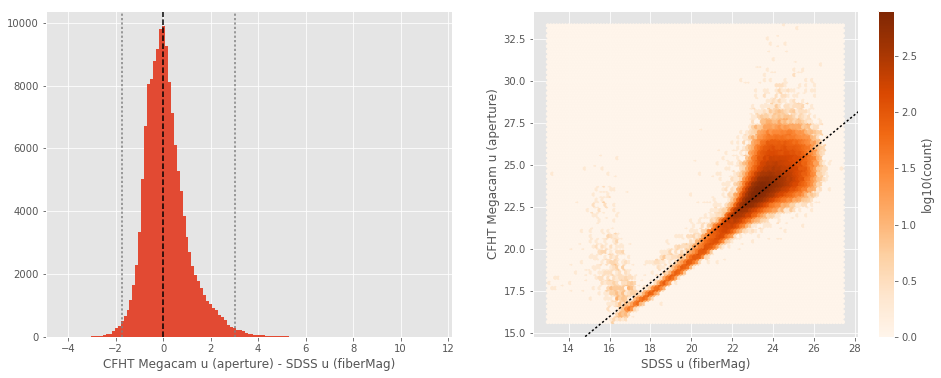

CFHT Megacam u (total) - SDSS u (petroMag):
- Median: 0.01
- Median Absolute Deviation: 0.52
- 1% percentile: -1.7239515686035158
- 99% percentile: 3.037174682617188


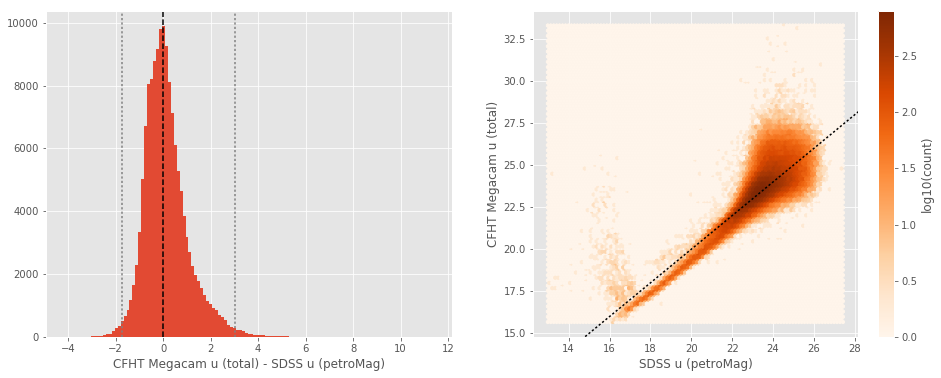

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.12
- 1% percentile: -1.153176498413086
- 99% percentile: 0.4261890411376952


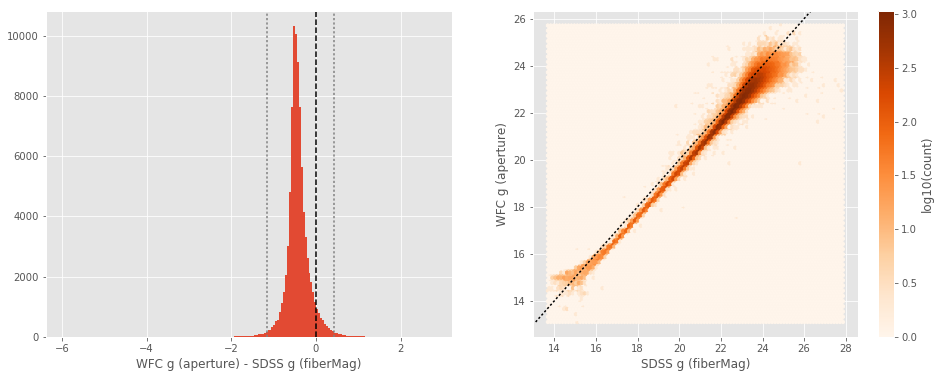

WFC g (total) - SDSS g (petroMag):
- Median: -0.45
- Median Absolute Deviation: 0.12
- 1% percentile: -1.153176498413086
- 99% percentile: 0.4261890411376952


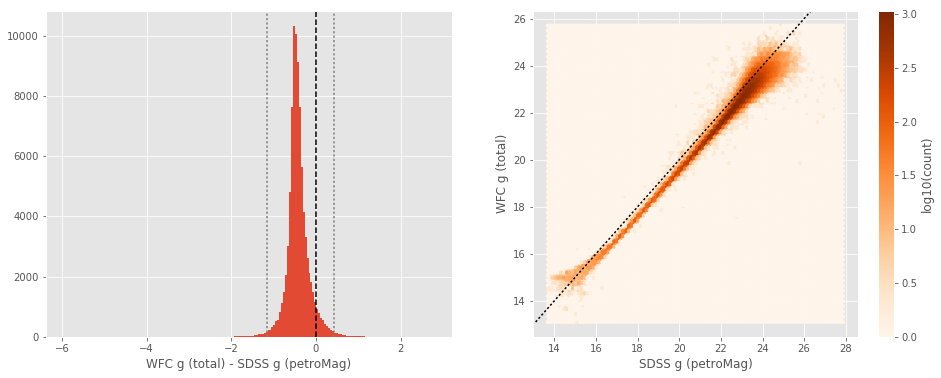

No sources have both SDSS g (fiberMag) and RCS g (aperture) values.
No sources have both SDSS g (petroMag) and RCS g (total) values.
CFHT Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0998111724853517
- 99% percentile: 1.262142181396477


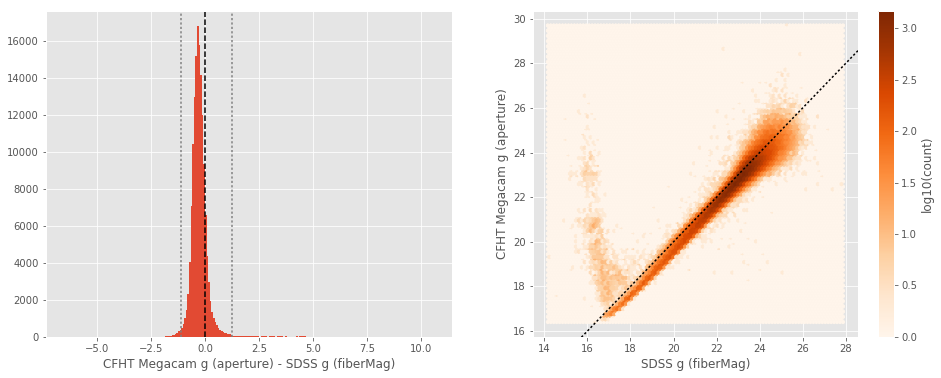

CFHT Megacam g (total) - SDSS g (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0998111724853517
- 99% percentile: 1.262142181396477


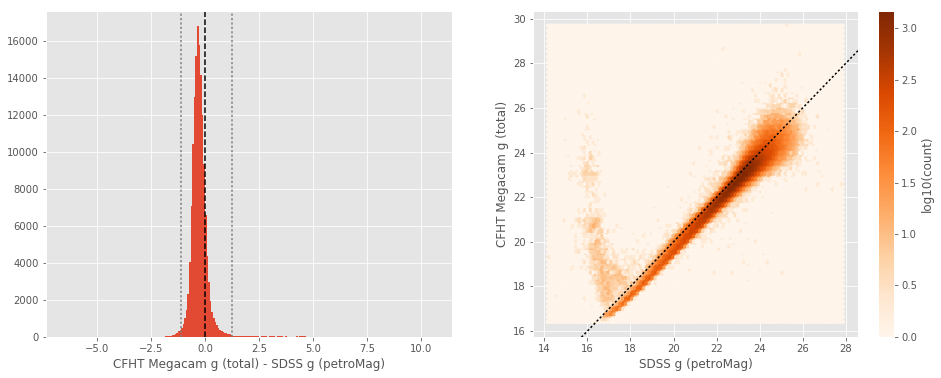

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.56
- Median Absolute Deviation: 0.26
- 1% percentile: -2.496896743774414
- 99% percentile: 1.7368240356445312


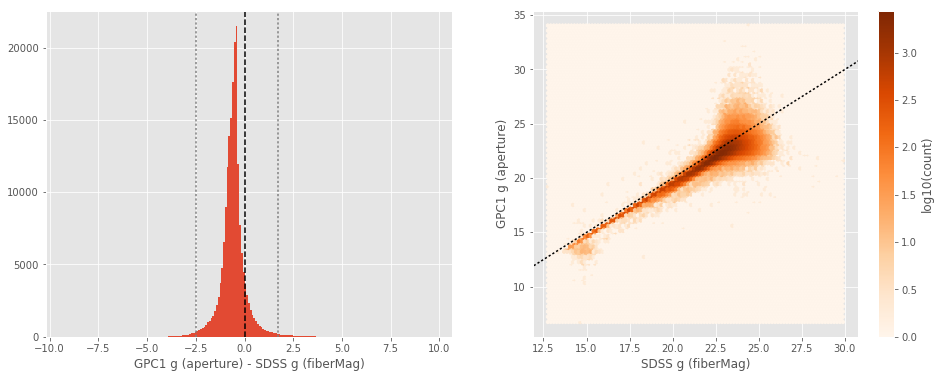

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.56
- Median Absolute Deviation: 0.26
- 1% percentile: -2.496896743774414
- 99% percentile: 1.7368240356445312


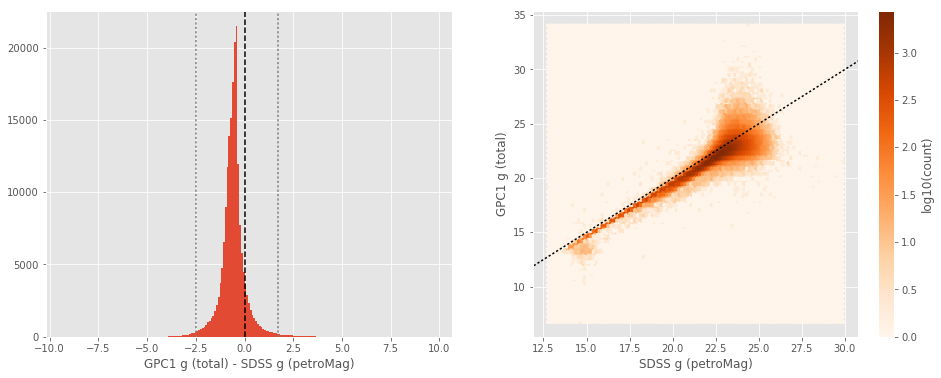

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9245659255981445
- 99% percentile: 0.3214846229553226


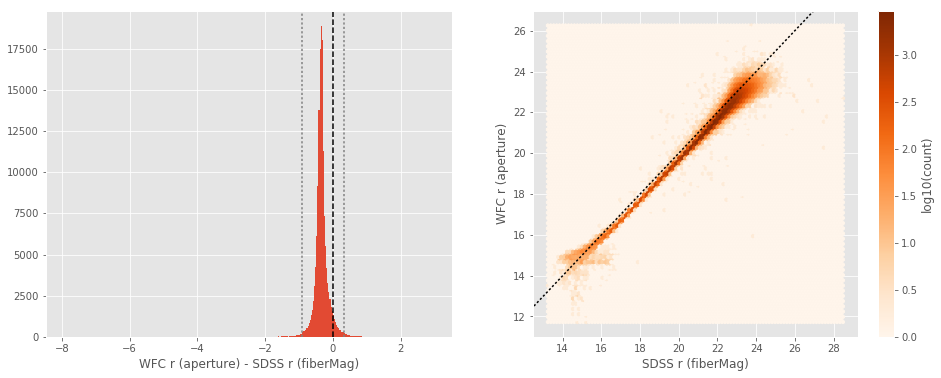

WFC r (total) - SDSS r (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9245659255981445
- 99% percentile: 0.3214846229553226


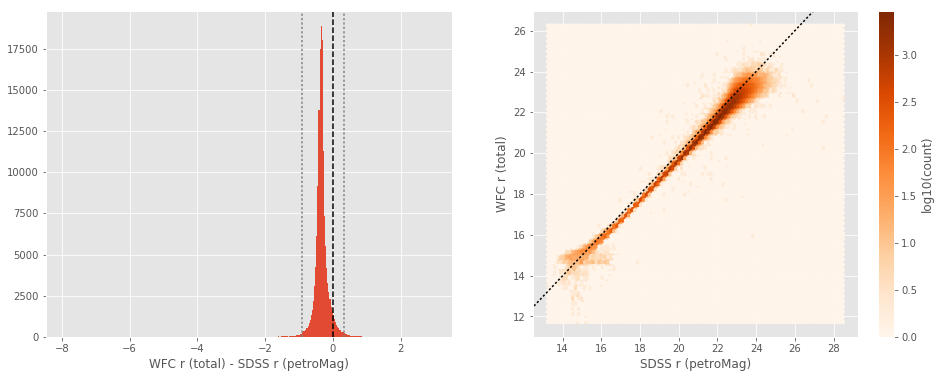

No sources have both SDSS r (fiberMag) and RCS r (aperture) values.
No sources have both SDSS r (petroMag) and RCS r (total) values.
CFHT Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8575413894653321
- 99% percentile: 2.322139625549326


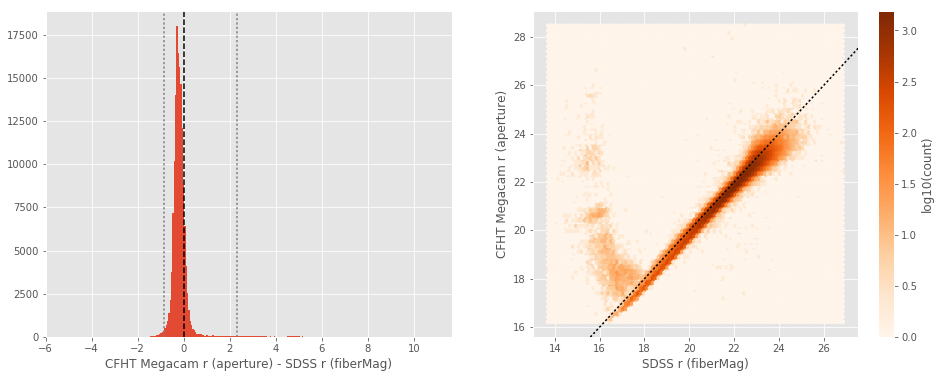

CFHT Megacam r (total) - SDSS r (petroMag):
- Median: -0.21
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8575413894653321
- 99% percentile: 2.322139625549326


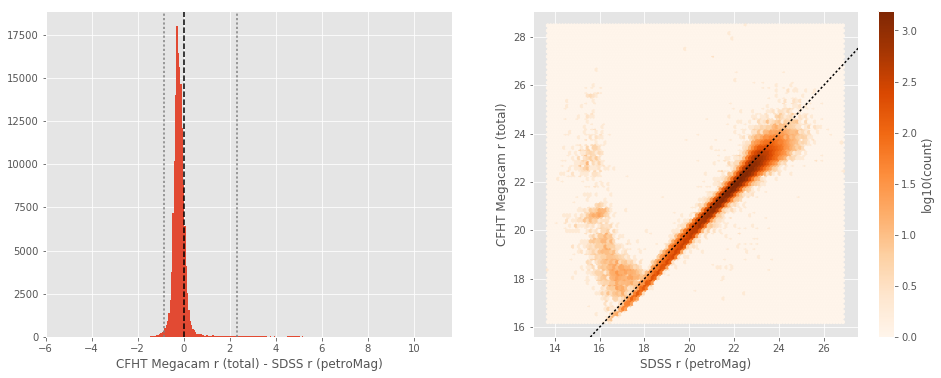

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5779302787780762
- 99% percentile: 0.6094411659240673


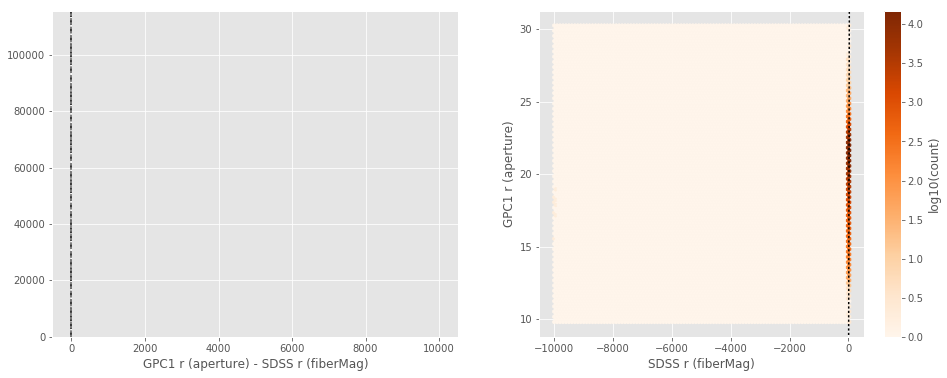

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.43
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5779302787780762
- 99% percentile: 0.6094411659240673


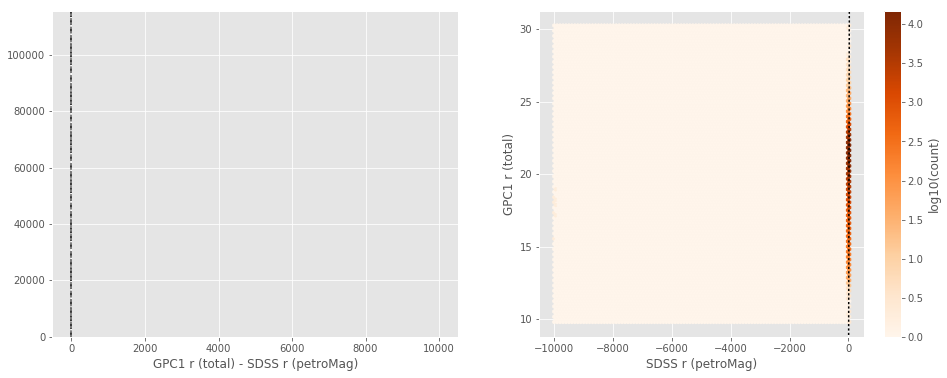

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9962218856811523
- 99% percentile: 0.35475969314575084


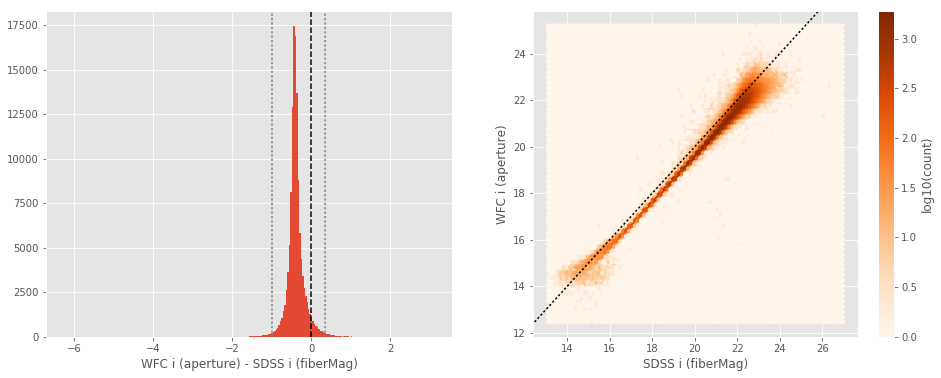

WFC i (total) - SDSS i (petroMag):
- Median: -0.41
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9962218856811523
- 99% percentile: 0.35475969314575084


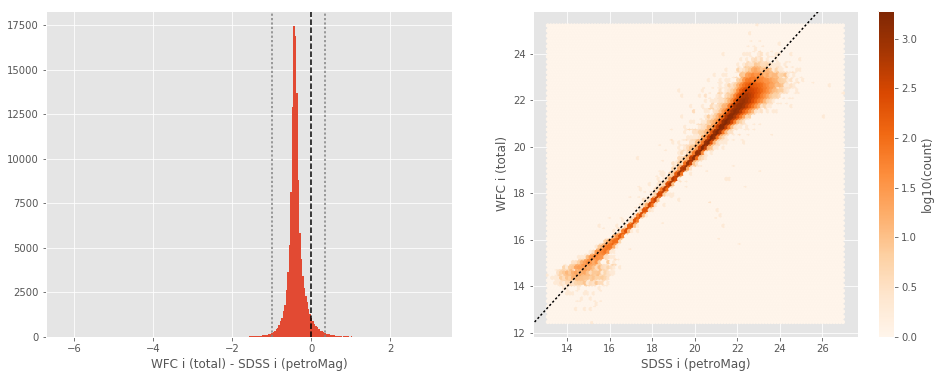

No sources have both SDSS i (fiberMag) and RCS i (aperture) values.
No sources have both SDSS i (petroMag) and RCS i (total) values.
GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1483933067321777
- 99% percentile: 0.3729721450805654


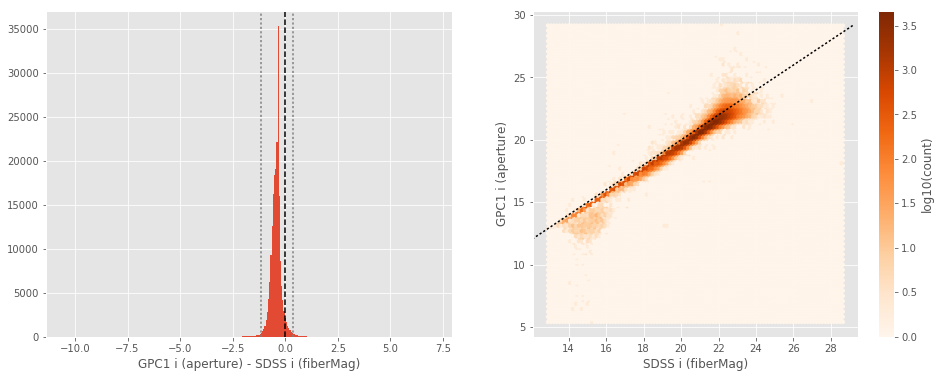

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.41
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1483933067321777
- 99% percentile: 0.3729721450805654


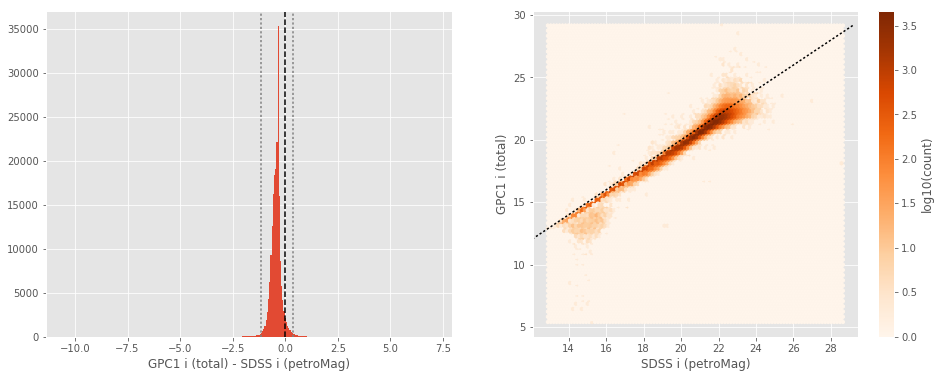

WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.12
- 1% percentile: -1.2592236328125
- 99% percentile: 0.6335509490966799


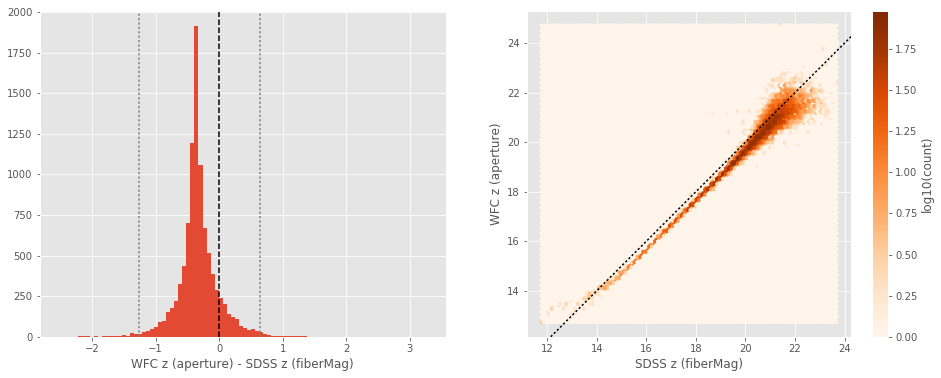

WFC z (total) - SDSS z (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.12
- 1% percentile: -1.2592236328125
- 99% percentile: 0.6335509490966799


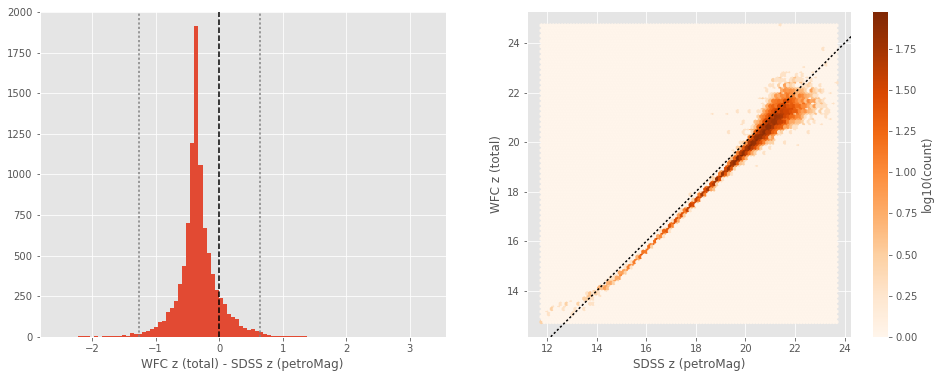

No sources have both SDSS z (fiberMag) and RCS z (aperture) values.
No sources have both SDSS z (petroMag) and RCS z (total) values.
CFHT Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.14
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1127138900756837
- 99% percentile: 2.7650779533386163


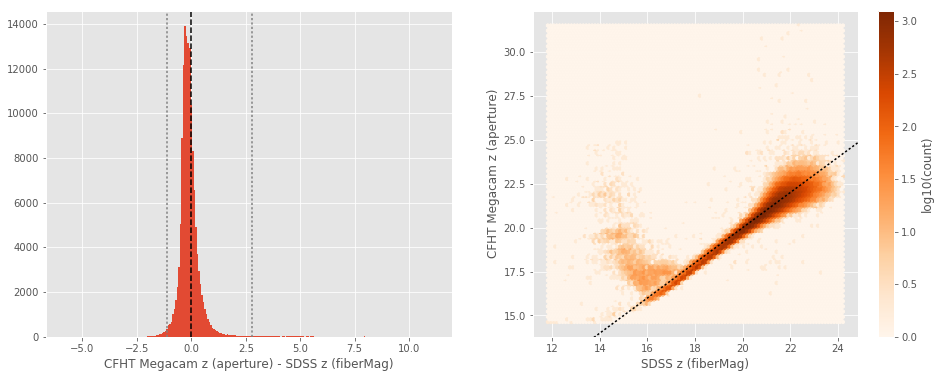

CFHT Megacam z (total) - SDSS z (petroMag):
- Median: -0.14
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1127138900756837
- 99% percentile: 2.7650779533386163


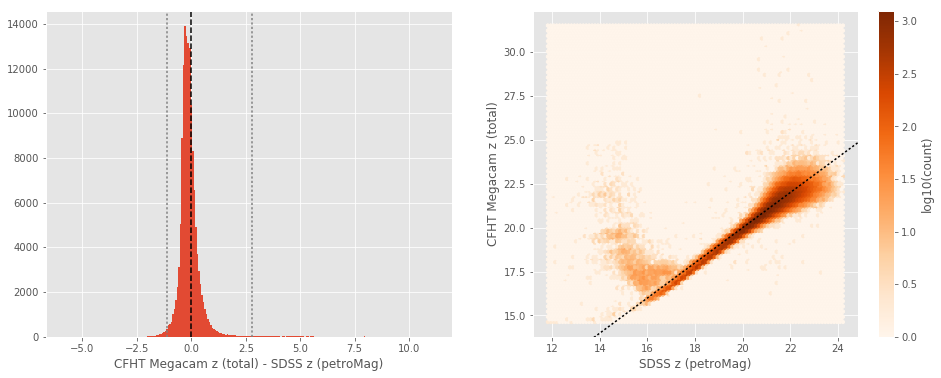

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.17
- 1% percentile: -1.4175505828857422
- 99% percentile: 1.0491403579711862


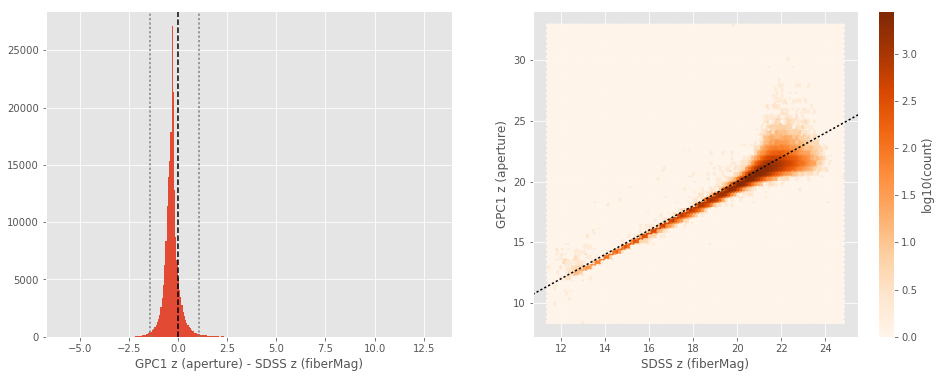

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.32
- Median Absolute Deviation: 0.17
- 1% percentile: -1.4175505828857422
- 99% percentile: 1.0491403579711862


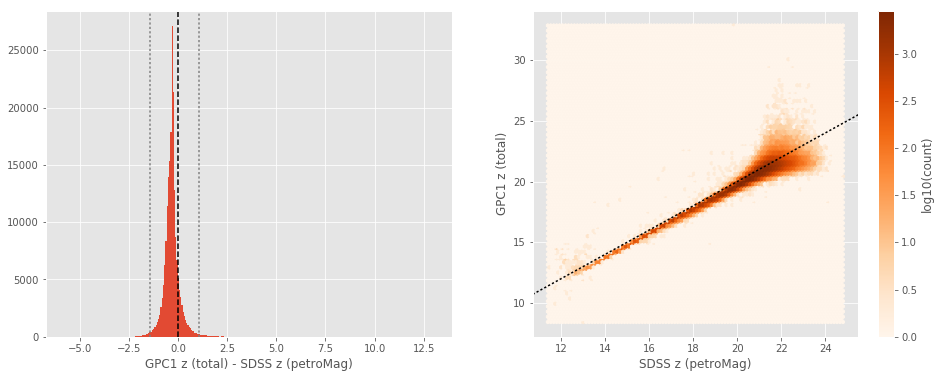

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Lockman-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WFCAM J (total) - 2MASS J:
- Median: 0.02
- Median Absolute Deviation: 0.05
- 1% percentile: -0.9130657836820437
- 99% percentile: 0.575751805124098


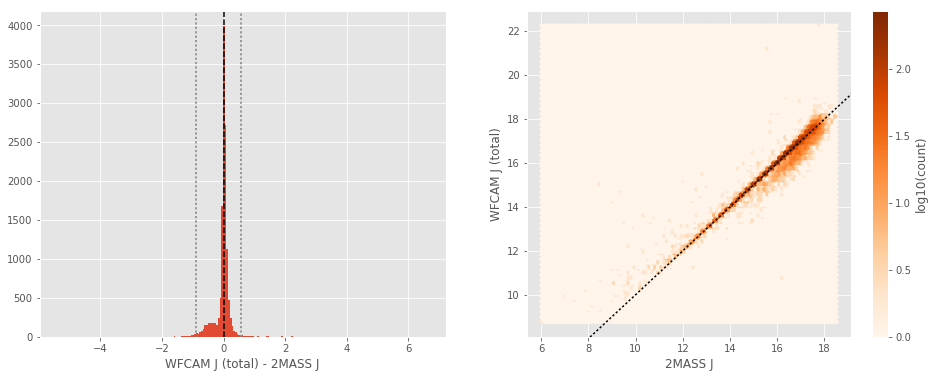

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "WFCAM J (total)"))

WFCAM Ks-like (total) - 2MASS Ks:
- Median: 0.07
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8240238957842398
- 99% percentile: 0.9100533730451055


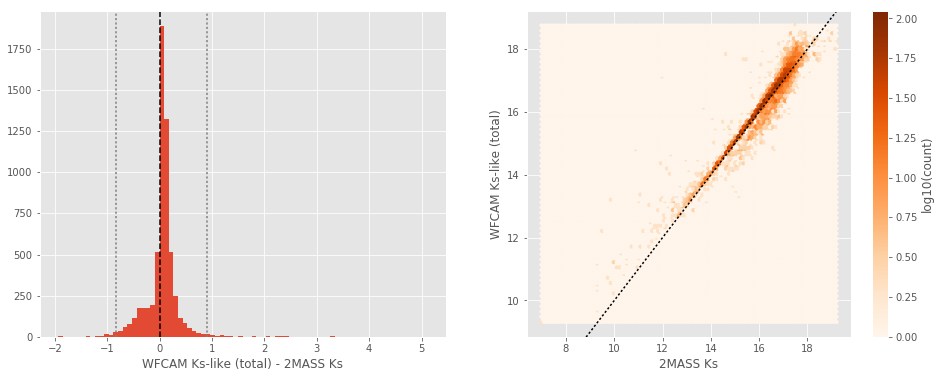

In [16]:
wfcam_ks_like = master_catalogue['m_wfcam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, wfcam_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "WFCAM Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [17]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 2456857 / 4366332 (56.27%)


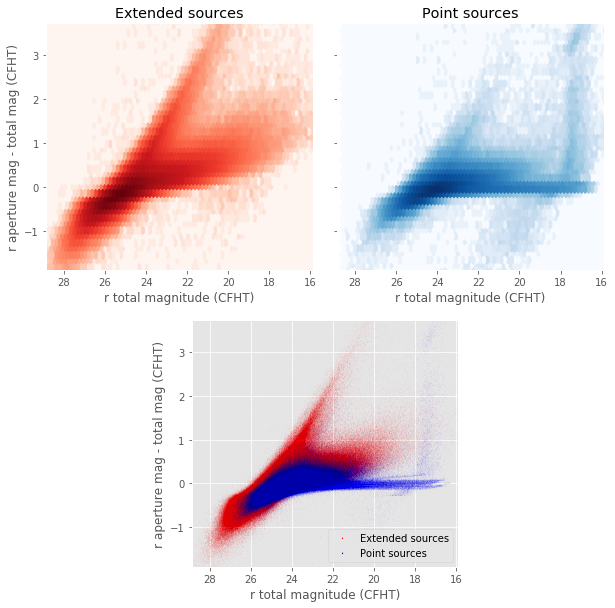

In [18]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_r'],
    master_catalogue['m_ap_cfht_megacam_r'] - master_catalogue['m_cfht_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 85805 / 4366332 (1.97%)


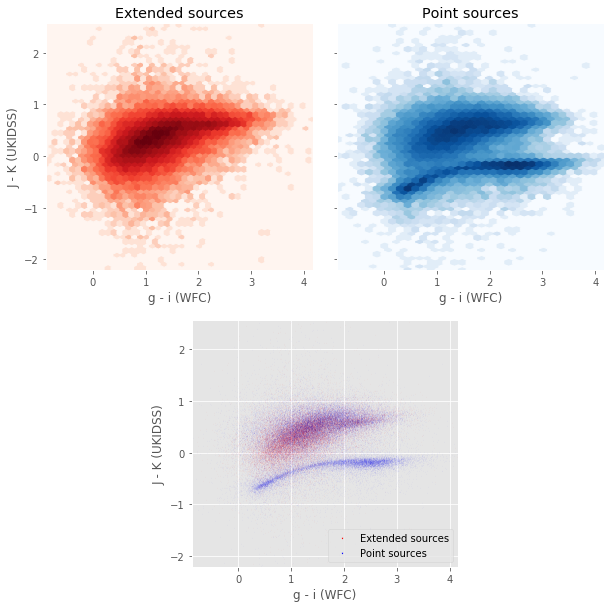

In [19]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    "g - i (WFC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 129379 / 4366332 (2.96%)


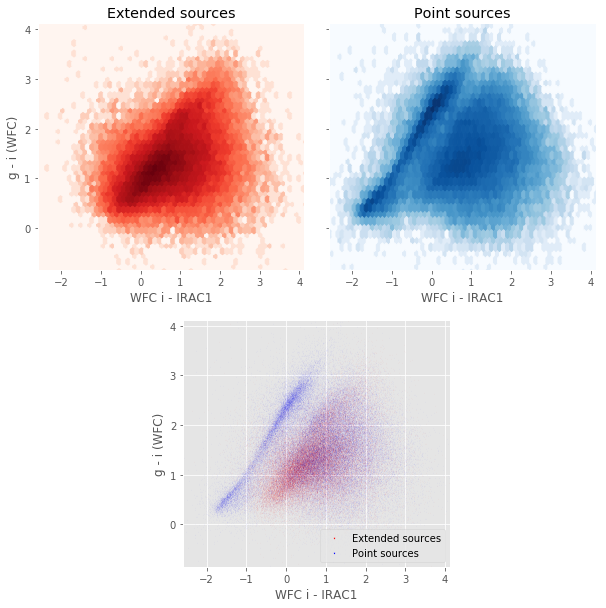

In [20]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 2070789 / 4366332 (47.43%)


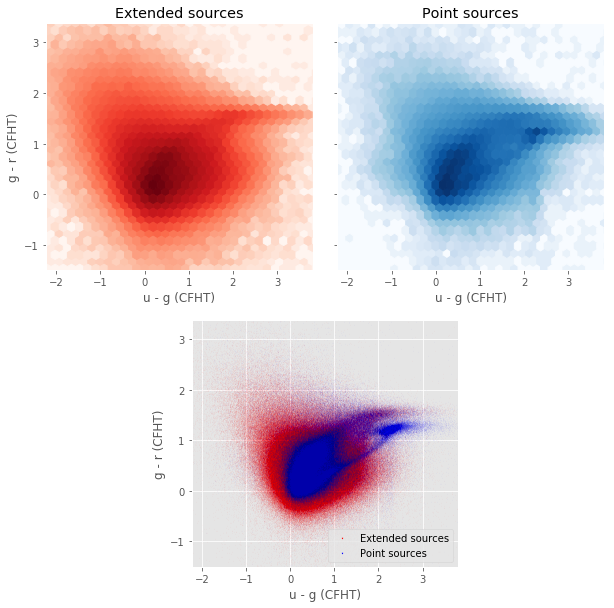

In [21]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_u'] - master_catalogue['m_cfht_megacam_g'],
    master_catalogue['m_cfht_megacam_g'] - master_catalogue['m_cfht_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 108739 / 4366332 (2.49%)


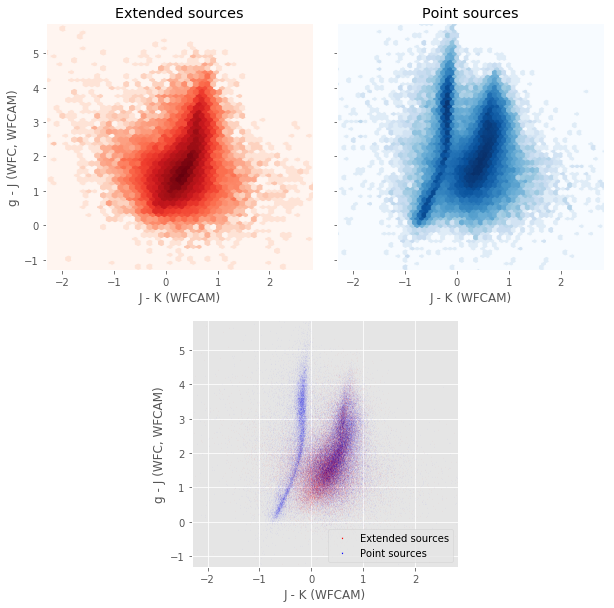

In [22]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfcam_j'],
    "J - K (WFCAM)", "g - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 11038 / 4366332 (0.25%)


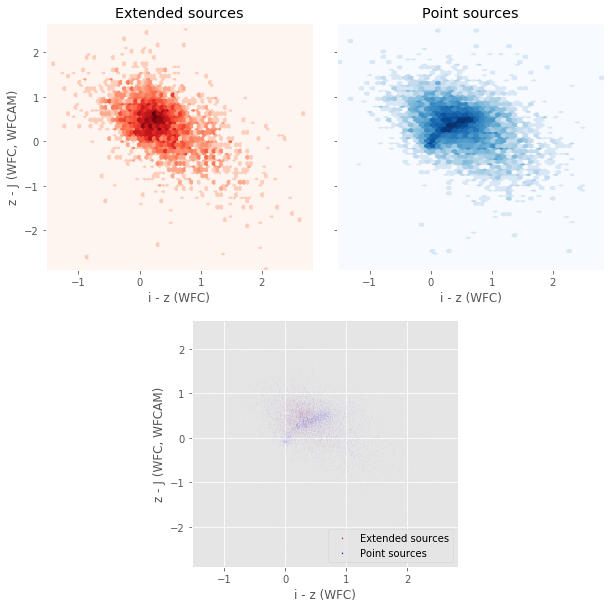

In [23]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_z'],
    master_catalogue['m_wfc_z'] - master_catalogue['m_wfcam_j'],
    "i - z (WFC)", "z - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 38805 / 4366332 (0.89%)


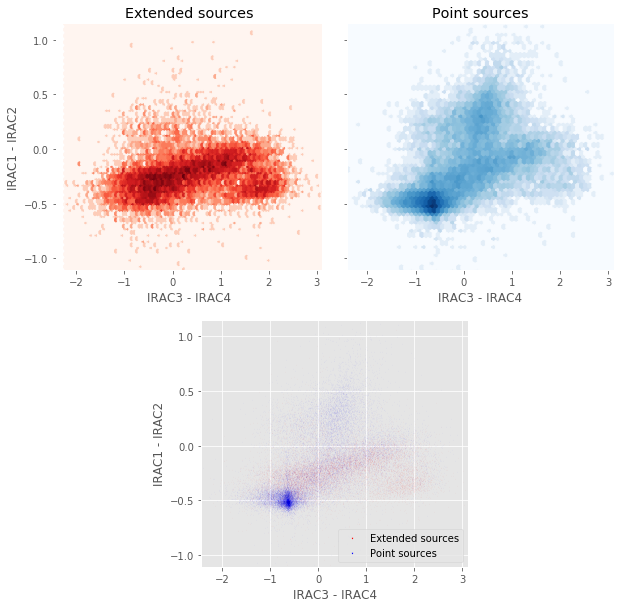

In [24]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)